## Hypothesis
To predict the incentive level requested to program dishwasher after 11pm
    
IV: Age, Gender, OwnRent, SqftCate, HouseholdS, Political, Ethnic, Income, Educ
    Latitude, HomeS, EnergyC, MC, ComfNS, HabitC, Summer_avg, Winter_avg


In [295]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);

data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
data1 <- data[data$HomeSYN==1,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Trust","MCG","Frugal","ComfortS","ComfortW","SubN","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];

In [296]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "HomeW" "28"   
[1] "AwayW" "87"   
[1] "AwayS" "101"  
[1] "IncWD" "56"   
[1] "IncDish" "183"    
[1] "Age" "4"  
[1] "Income" "3"     
[1] "Educ" "5"   
[1] "Latitude" "21"      
[1] "Summer_avgF" "33"         
[1] "Winter_avgF" "33"         
[1] "Summer_avgC" "33"         
[1] "Winter_avgC" "33"         
[1] "Summer_avg" "33"        
[1] "Winter_avg" "33"        


In [297]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeW","AwayW",
                    "AwayS","IncWD"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))
#table(data2$Political)

[1] 662 107
[1] 436 107


In [298]:
sort(names(data2))

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "Attitude"    "BillS"       "BillW"       "CashYN"     
 [11] "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"     "ComfNW"     
 [16] "ComfNW1"     "ComfNW2"     "ControlN1"   "ControlN2R"  "ControlN3"  
 [21] "ControlN4"   "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"     
 [26] "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"   
 [31] "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal1"     "Frugal2"    
 [36] "Frugal3"     "Gender"      "HabitC"      "HabitC1"     "HabitC2"    
 [41] "HabitC3"     "HabitC4"     "HabitC5"     "HabitC6"     "HabitC7"    
 [46] "HabitE1"     "HabitE2"     "HabitE3"     "HabitG"      "HomeS"      
 [51] "HouseholdS"  "INT1"        "INT2"        "INT3"        "INT4"       
 [56] "IncAutoS"    "IncAutoW"    "IncAwayS"    "IncAwayW"    "IncDish"    
 [61] "IncEmer10S"  "IncEmer10W"  "IncEmer30S"  "IncEmer30W"  "IncHomeS"   
 [66] "IncHomeW"    "Income"      "Latitude"    "MC"          "MC1"        
 [71] "MC2"         "MC3"         "MC4"         "MC5"         "MCBill"     
 [76] "OwnRent"     "PBC"         "PBC1"        "PBC2"        "PBC3R"      
 [81] "PBC4"        "PBC5"        "Political"   "RewardForm"  "SN"         
 [86] "SN1"         "SN2"         "SN3"         "SN4"         "Sqft"       
 [91] "SqftCate"    "State"       "SubNorm"     "SubNorm1"    "SubNorm2"   
 [96] "SubNorm3"    "Summer_avg"  "Summer_avgC" "Summer_avgF" "Trust1"     
[101] "Trust2"      "Trust3"      "Trust4"      "Winter_avg"  "Winter_avgC"
[106] "Winter_avgF" "X.9to5"

In [299]:
#names(data2)
#These are only variables we really care about
IVS = IVS = c("Age",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Income",
"Educ",
"MC",
"EnergyC",
"PBC",
"Attitude",
"SubNorm",
"HabitC",
"HabitG",
"ConvB1",
"CashYN")

In [300]:
sort(names(data2))
paste(sort(IVS))

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "Attitude"    "BillS"       "BillW"       "CashYN"     
 [11] "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"     "ComfNW"     
 [16] "ComfNW1"     "ComfNW2"     "ControlN1"   "ControlN2R"  "ControlN3"  
 [21] "ControlN4"   "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"     
 [26] "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"   
 [31] "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal1"     "Frugal2"    
 [36] "Frugal3"     "Gender"      "HabitC"      "HabitC1"     "HabitC2"    
 [41] "HabitC3"     "HabitC4"     "HabitC5"     "HabitC6"     "HabitC7"    
 [46] "HabitE1"     "HabitE2"     "HabitE3"     "HabitG"      "HomeS"      
 [51] "HouseholdS"  "INT1"        "INT2"        "INT3"        "INT4"       
 [56] "IncAutoS"    "IncAutoW"    "IncAwayS"    "IncAwayW"    "IncDish"    
 [61] "IncEmer10S"  "IncEmer10W"  "IncEmer30S"  "IncEmer30W"  "IncHomeS"   
 [66] "IncHomeW"    "Income"      "Latitude"    "MC"          "MC1"        
 [71] "MC2"         "MC3"         "MC4"         "MC5"         "MCBill"     
 [76] "OwnRent"     "PBC"         "PBC1"        "PBC2"        "PBC3R"      
 [81] "PBC4"        "PBC5"        "Political"   "RewardForm"  "SN"         
 [86] "SN1"         "SN2"         "SN3"         "SN4"         "Sqft"       
 [91] "SqftCate"    "State"       "SubNorm"     "SubNorm1"    "SubNorm2"   
 [96] "SubNorm3"    "Summer_avg"  "Summer_avgC" "Summer_avgF" "Trust1"     
[101] "Trust2"      "Trust3"      "Trust4"      "Winter_avg"  "Winter_avgC"
[106] "Winter_avgF" "X.9to5"

[1] "Age"        "Attitude"   "CashYN"     "ConvB1"     "Educ"      
 [6] "EnergyC"    "Gender"     "HabitC"     "HabitG"     "HouseholdS"
[11] "Income"     "MC"         "OwnRent"    "PBC"        "Political" 
[16] "SqftCate"   "SubNorm"

In [301]:
data1 <- data2[, which(names(data2) %in% c("IncDish",IVS))];
sort(names(data1))

[1] "Age"        "Attitude"   "CashYN"     "ConvB1"     "Educ"      
 [6] "EnergyC"    "Gender"     "HabitC"     "HabitG"     "HouseholdS"
[11] "IncDish"    "Income"     "MC"         "OwnRent"    "PBC"       
[16] "Political"  "SqftCate"   "SubNorm"

In [302]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [303]:
#names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

In [304]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "IncDish"    "ConvB1"     "Age"        "Gender"     "OwnRent"   
 [6] "SqftCate"   "HouseholdS" "Political"  "Income"     "Educ"      
[11] "EnergyC"    "Attitude"   "PBC"        "CashYN"     "MC"        
[16] "SubNorm"    "HabitG"     "HabitC"

In [305]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [306]:
hiCor(data2,.7)

<0 x 0 matrix>

In [307]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:15];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:15){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


[1] 0.18
    ConvB1 EnergyC Attitude   PBC    MC SubNorm HabitG HabitC
PC1   0.38   -0.37    -0.42 -0.27 -0.37   -0.31  -0.31  -0.24
[1] 0.3
      Age OwnRent SqftCate HouseholdS Income
PC2 -0.37   -0.51    -0.54      -0.28  -0.41
[1] 0.38
    IncDish HouseholdS Political Income  Educ EnergyC  PBC HabitG
PC3    0.36       0.28     -0.32  -0.27 -0.54   -0.25 0.24   0.24
[1] 0.45
    Gender HouseholdS Political  Educ EnergyC Attitude HabitG HabitC
PC4   0.45       0.36      0.34 -0.24    0.32     0.24  -0.27  -0.45
[1] 0.51
    IncDish  Age Gender HouseholdS Political
PC5    0.54 0.49   0.22      -0.42      0.36
[1] 0.57
    IncDish  Educ CashYN HabitC
PC6   -0.23 -0.21  -0.85   0.22
[1] 0.63
    ConvB1 Gender Political Income   PBC SubNorm
PC7   0.34   0.36     -0.38  -0.22 -0.46    0.47
[1] 0.68
    IncDish  Age HouseholdS  Educ   PBC CashYN SubNorm HabitG
PC8   -0.55 0.34      -0.31 -0.26 -0.33   0.28   -0.22   0.23
[1] 0.72
    Political  Educ   PBC CashYN    MC HabitG HabitC
PC9    

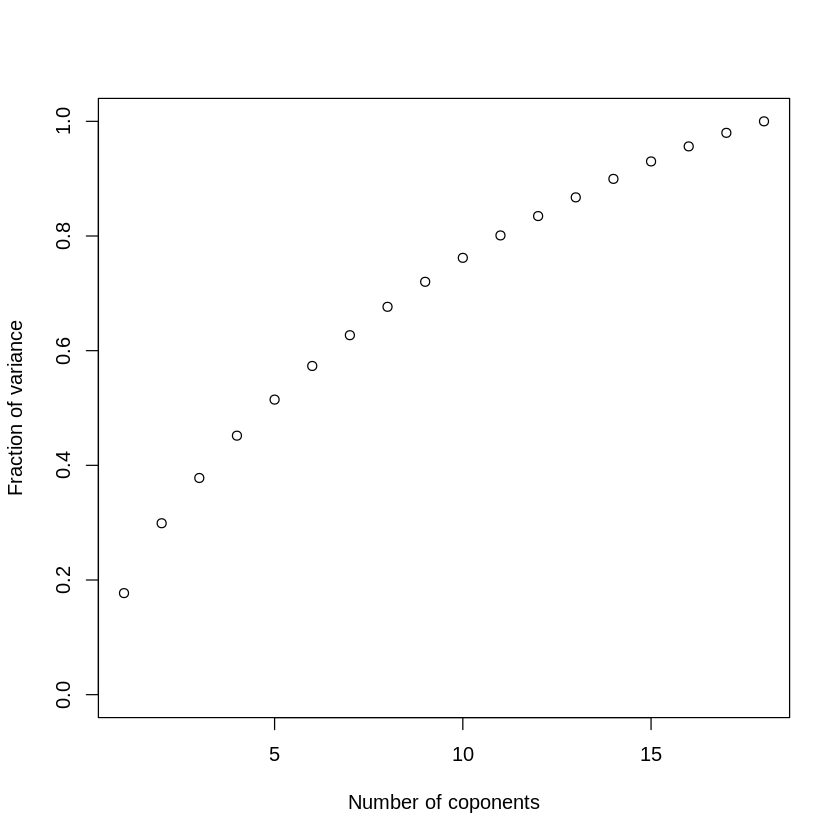

In [308]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [309]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [310]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

Attitude,12,0.47
EnergyC,11,0.42
SqftCate,6,0.39
ConvB1,2,0.36
OwnRent,5,0.32
MC,15,0.32
SubNorm,16,0.24
HabitG,17,0.24
Income,9,0.23
HouseholdS,7,0.21
Age,3,0.20


In [311]:
#Age, Gender, OwnRent, SqftCate, Income, Educ, EnergyC, MC, ConvB1, HabitG, Attitude, PBC, SubNorm
IndepPred = c("Age","SqftCate","OwnRent","Income","Educ","MC","EnergyC","PBC","SubNorm","HabitG","Attitude")
fmla <- as.formula(paste("IncDish",paste(IndepPred,collapse="+"),sep="~"));

In [312]:
table(data2[,"IncDish"])


  1   2   3   4   5   6   7 
 46  49  58 115  32 106  30 

In [313]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.662 -1.248  0.069  1.444  3.581 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.83032    0.80266    4.77  2.5e-06 ***
Age          0.02662    0.00827    3.22   0.0014 ** 
SqftCate     0.11382    0.09382    1.21   0.2257    
OwnRent     -0.08066    0.19555   -0.41   0.6802    
Income      -0.08198    0.05012   -1.64   0.1026    
Educ        -0.02177    0.08152   -0.27   0.7895    
MC           0.11203    0.09234    1.21   0.2257    
EnergyC     -0.08274    0.07398   -1.12   0.2641    
PBC          0.13458    0.09745    1.38   0.1680    
SubNorm     -0.00746    0.06867   -0.11   0.9135    
HabitG      -0.00314    0.07943   -0.04   0.9685    
Attitude    -0.21079    0.10021   -2.10   0.0360 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.8 on 424 degrees of freedom
Multiple R-squared:  0.0632,	Adjusted R-squared: 

In [314]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,32.76,32.76,10.664,0.0012
SqftCate,1,0.98,0.98,0.318,0.5730
OwnRent,1,1.91,1.91,0.622,0.4309
Income,1,10.36,10.36,3.373,0.0670
Educ,1,1.39,1.39,0.453,0.5012
MC,1,0.34,0.34,0.111,0.7390
EnergyC,1,22.74,22.74,7.403,0.0068
PBC,1,3.37,3.37,1.098,0.2953
SubNorm,1,0.41,0.41,0.135,0.7137
HabitG,1,0.05,0.05,0.016,0.8983


In [315]:
#added CashYN to model
IndepPred = c("Age","SqftCate","OwnRent","Income","Educ","MC","EnergyC","PBC","SubNorm","HabitG","Attitude","CashYN")
fmla <- as.formula(paste("IncDish",paste(IndepPred,collapse="+"),sep="~"));

In [316]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.694 -1.225  0.063  1.441  3.665 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.64229    0.83782    4.35  1.7e-05 ***
Age          0.02632    0.00828    3.18   0.0016 ** 
SqftCate     0.11538    0.09388    1.23   0.2198    
OwnRent     -0.06557    0.19658   -0.33   0.7389    
Income      -0.08353    0.05018   -1.66   0.0967 .  
Educ        -0.02246    0.08156   -0.28   0.7832    
MC           0.10811    0.09251    1.17   0.2432    
EnergyC     -0.08233    0.07402   -1.11   0.2667    
PBC          0.13432    0.09750    1.38   0.1690    
SubNorm     -0.00661    0.06871   -0.10   0.9234    
HabitG      -0.00350    0.07947   -0.04   0.9649    
Attitude    -0.21626    0.10049   -2.15   0.0320 *  
CashYNTRUE   0.25333    0.32192    0.79   0.4318    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.8 on 423 degrees of free

In [317]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,32.76,32.76,10.655,0.0012
SqftCate,1,0.98,0.98,0.318,0.5732
OwnRent,1,1.91,1.91,0.621,0.4311
Income,1,10.36,10.36,3.370,0.0671
Educ,1,1.39,1.39,0.453,0.5014
MC,1,0.34,0.34,0.111,0.7391
EnergyC,1,22.74,22.74,7.397,0.0068
PBC,1,3.37,3.37,1.097,0.2955
SubNorm,1,0.41,0.41,0.135,0.7138
HabitG,1,0.05,0.05,0.016,0.8983
